### Analyzing the 2002-2023 (current) Mega Millions Winning Lotto Numbers data from data.gov

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
df = pd.read_csv('Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv')


In [3]:
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


In [4]:
# Let's separate the 'Winning Numbers' column into individual columns for each number using .split()
winning_numbers = df['Winning Numbers'].str.split(' ')
# winning_numbers

for i in range(1,6):
    df[f'number_{i}'] = winning_numbers.str[i-1].astype(int)

In [5]:
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,number_1,number_2,number_3,number_4,number_5
0,09/25/2020,20 36 37 48 67,16,2.0,20,36,37,48,67
1,09/29/2020,14 39 43 44 67,19,3.0,14,39,43,44,67
2,10/02/2020,09 38 47 49 68,25,2.0,9,38,47,49,68
3,10/06/2020,15 16 18 39 59,17,3.0,15,16,18,39,59
4,10/09/2020,05 11 25 27 64,13,2.0,5,11,25,27,64


In [6]:
df['Multiplier'].value_counts()

3.0    429
4.0    365
2.0    327
5.0    190
Name: Multiplier, dtype: int64

In [7]:
df.shape

(2214, 9)

In [8]:
# Look for NA values
df.isna().sum()

# Should we drop these or impute?
# Let's determine how to impute these values by examining the distribution

Draw Date            0
Winning Numbers      0
Mega Ball            0
Multiplier         903
number_1             0
number_2             0
number_3             0
number_4             0
number_5             0
dtype: int64

<AxesSubplot:xlabel='Multiplier', ylabel='Count'>

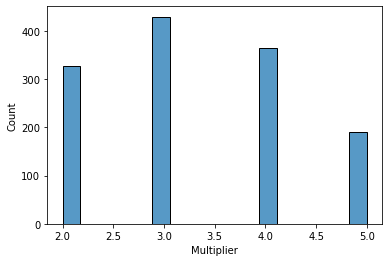

In [9]:
sns.histplot(data=df['Multiplier'])

Text(0.5, 1.0, 'Heatmap of Missing Data')

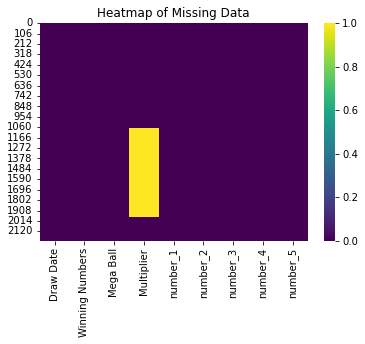

In [10]:
# Use a heatmap to find the locations of the missing data
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Heatmap of Missing Data')

In [11]:
df['Draw Date'][df['Multiplier'].isnull()]

1071    01/14/2011
1072    01/11/2011
1073    01/07/2011
1074    01/04/2011
1075    12/31/2010
           ...    
1969    05/31/2002
1970    05/28/2002
1971    05/24/2002
1972    05/21/2002
1973    05/17/2002
Name: Draw Date, Length: 903, dtype: object

#### Since there seems to be a lot of missing data localized around a consecutive range of years, let's just try imputing with the mode and see what happens

In [12]:
df['Multiplier'] = df['Multiplier'].fillna(df['Multiplier'].mode()[0])
df['Multiplier'].isna().sum()


0

In [13]:
df.isnull().sum()
df.Multiplier = df['Multiplier'].astype(int)

### This data is fairly weighted toward the 3 multiplier but we can revist this and more evenly distribute the multipliers between each value

#### It's unlikely that the multiplier has any sort of bearing on the winning numbers

<AxesSubplot:xlabel='Multiplier', ylabel='Count'>

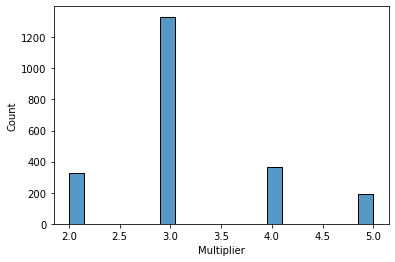

In [14]:
sns.histplot(df['Multiplier'])

In [17]:
# for i in range(1,6):
#     sns.histplot(data=df[f'number_{i}'], scale = 'viridis')

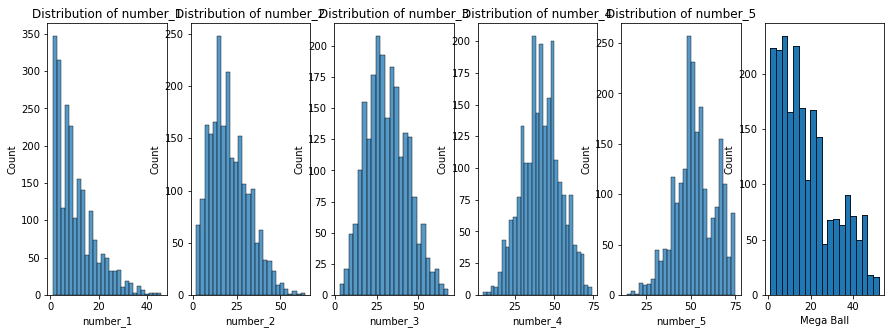

In [18]:
columns_to_plot = [f'number_{i}' for i in range(1, 6)]

# Create subplots with a grid layout
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Plot distributions for each variable
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[f'number_{i+1}'], ax=axes[i], color=None)  # Automatically assign colors
    axes[i].set_title(f'Distribution of {column}')
    sns.histplot(df['Mega Ball'])

#### Well that's interesting, it seems there is a pattern between the distribution of drawn numbers based on their drawing order
#### Let's quantify this in a table

In [19]:
columns = [f'number_{i}' for i in range(1,6)]

modes = df[columns].mode().iloc[0]

In [20]:
df_descr = df[columns].describe().append(modes).rename(index={0:'mode'})
df_descr['mega'] = (df['Mega Ball'].describe().append(modes))
df_descr

C:\Users\bonfi\AppData\Local\Temp\ipykernel_2120\3978012909.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_descr = df[columns].describe().append(modes).rename(index={0:'mode'})
C:\Users\bonfi\AppData\Local\Temp\ipykernel_2120\3978012909.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_descr['mega'] = (df['Mega Ball'].describe().append(modes))


,number_1,number_2,number_3,number_4,number_5,mega
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,10.289973,20.838302,31.410117,42.009485,52.692412,18.256549
std,8.256065,10.923637,12.232231,12.212770,11.357589,12.874209
min,1.000000,2.000000,3.000000,5.000000,14.000000,1.000000
25%,4.000000,12.000000,22.000000,34.000000,46.000000,8.000000
50%,8.000000,19.000000,31.000000,42.000000,52.000000,15.000000
75%,15.000000,28.000000,40.000000,50.000000,61.000000,26.000000
max,46.000000,64.000000,68.000000,74.000000,75.000000,52.000000
mode,2.000000,17.000000,31.000000,46.000000,52.000000,NaN


In [21]:
mega_mode = df['Mega Ball'].mode()[0]

df_descr['mega'] = df_descr['mega'].fillna(mega_mode)
df_descr

,number_1,number_2,number_3,number_4,number_5,mega
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,10.289973,20.838302,31.410117,42.009485,52.692412,18.256549
std,8.256065,10.923637,12.232231,12.212770,11.357589,12.874209
min,1.000000,2.000000,3.000000,5.000000,14.000000,1.000000
25%,4.000000,12.000000,22.000000,34.000000,46.000000,8.000000
50%,8.000000,19.000000,31.000000,42.000000,52.000000,15.000000
75%,15.000000,28.000000,40.000000,50.000000,61.000000,26.000000
max,46.000000,64.000000,68.000000,74.000000,75.000000,52.000000
mode,2.000000,17.000000,31.000000,46.000000,52.000000,9.000000


In [22]:
df['Mega Ball'].value_counts()

9     87
10    86
15    84
7     82
13    82
4     82
11    79
3     79
6     77
1     76
12    72
14    71
2     68
8     65
5     62
22    60
21    57
24    55
19    54
25    51
18    50
20    50
17    47
16    38
23    37
36    37
34    34
38    33
35    29
42    29
29    27
33    27
44    26
39    25
26    25
31    25
40    24
30    24
46    23
45    23
41    22
27    21
43    21
37    20
28    17
32    17
52    11
47     7
49     7
50     4
48     4
51     1
Name: Mega Ball, dtype: int64

#### So it seems that over the entire time range, the most commonly picked numbers are 2,17,31,46,52
#### The most common Mega Ball drawing is 9 then 10,15,7,13,4,11, etc.


#### Let's see how each winning number changes as time progresses (plot number_{i} vs. Draw Date)

In [23]:
df.dtypes

Draw Date          object
Winning Numbers    object
Mega Ball           int64
Multiplier          int32
number_1            int32
number_2            int32
number_3            int32
number_4            int32
number_5            int32
dtype: object

In [24]:
# Convert 'Draw Date' to datetime
df['Draw Date'] = pd.to_datetime(df['Draw Date'])
df.set_index('Draw Date', inplace=True)

In [25]:
df.head()

,Winning Numbers,Mega Ball,Multiplier,number_1,number_2,number_3,number_4,number_5
Draw Date,,,,,,,,
2020-09-25,20 36 37 48 67,16,2,20,36,37,48,67
2020-09-29,14 39 43 44 67,19,3,14,39,43,44,67
2020-10-02,09 38 47 49 68,25,2,9,38,47,49,68
2020-10-06,15 16 18 39 59,17,3,15,16,18,39,59
2020-10-09,05 11 25 27 64,13,2,5,11,25,27,64


In [26]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

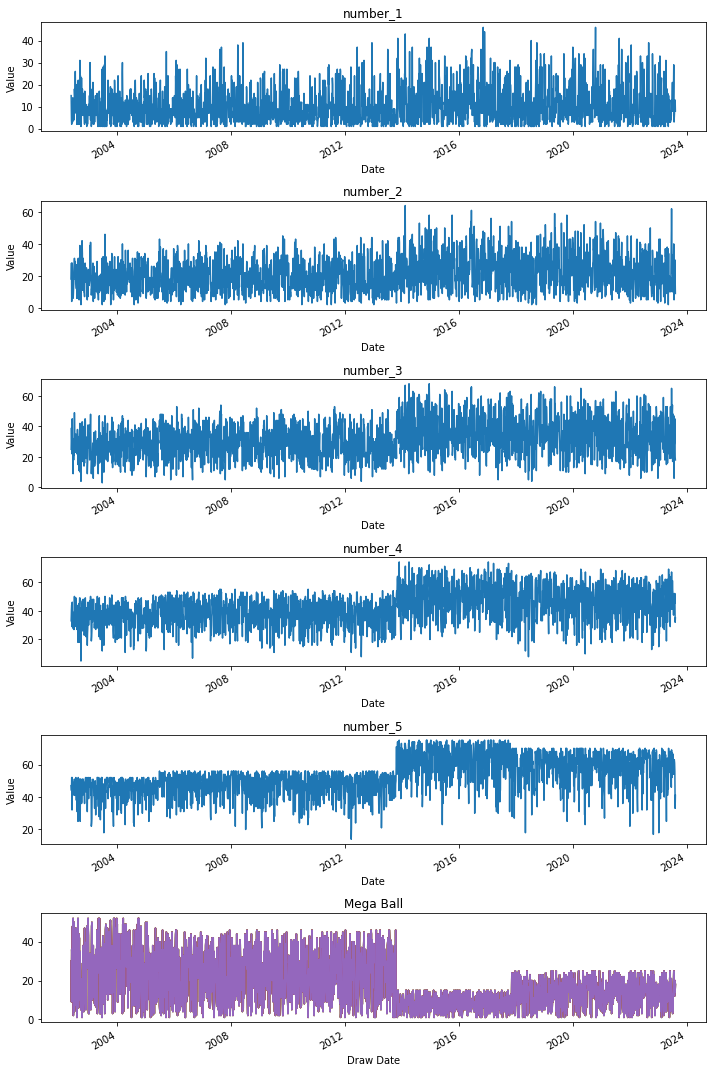

In [27]:
# Plot each number against time
fig, axes = plt.subplots(6,1, figsize=(10,15))

for i, column in enumerate(['number_1', 'number_2', 'number_3', 'number_4', 'number_5']):
    df[[column]].plot(ax=axes[i], legend=False)
    df['Mega Ball'].plot(x=df['year'], title='Mega Ball')
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    
plt.tight_layout()

#### This is interesting...it looks like there was a large spike in the max possible value of draw number introduced in 2013-2014 and a sharp decrease in the max possible Mega Ball value
#### There's an apparent ungilation in winning numbers throughout the year

In [28]:
df.groupby('year')['number_5'].max()

year
2002    52
2003    52
2004    52
2005    56
2006    56
2007    56
2008    56
2009    56
2010    56
2011    56
2012    56
2013    75
2014    75
2015    75
2016    75
2017    75
2018    70
2019    70
2020    70
2021    70
2022    70
2023    70
Name: number_5, dtype: int32

#### In 2013, they increased the maximum possible draw value from 56 to 75, then back down to 70 after 2017!!!

In [29]:
df.head()

,Winning Numbers,Mega Ball,Multiplier,number_1,number_2,number_3,number_4,number_5,year,month,day
Draw Date,,,,,,,,,,,
2020-09-25,20 36 37 48 67,16,2,20,36,37,48,67,2020,9,25
2020-09-29,14 39 43 44 67,19,3,14,39,43,44,67,2020,9,29
2020-10-02,09 38 47 49 68,25,2,9,38,47,49,68,2020,10,2
2020-10-06,15 16 18 39 59,17,3,15,16,18,39,59,2020,10,6
2020-10-09,05 11 25 27 64,13,2,5,11,25,27,64,2020,10,9


### Use FB Prophet forecasting model to make predictions

In [30]:
# import modules
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### Since the rules were changed in 2013, we only care about modeling from 2013-2023

In [46]:
# Create a shorter dataframe, only including dates from 2013 on
model_df = df.loc[df.index >= '2013-01-01']
model_df.index.min()
model_df.drop('Winning Numbers', axis=1, inplace=True)
model_df.drop(columns=['year','month','day','Multiplier'], axis=1, inplace=True)


C:\Users\bonfi\AppData\Local\Temp\ipykernel_2120\2559867828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.drop('Winning Numbers', axis=1, inplace=True)
C:\Users\bonfi\AppData\Local\Temp\ipykernel_2120\2559867828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.drop(columns=['year','month','day','Multiplier'], axis=1, inplace=True)


In [47]:
# Split into training and testing data
train = model_df.loc[model_df.index <= '2020-12-31']
test = model_df.loc[model_df.index >'2021-01-01']

In [48]:
train.head()

,Mega Ball,number_1,number_2,number_3,number_4,number_5
Draw Date,,,,,,
2020-09-25,16,20,36,37,48,67
2020-09-29,19,14,39,43,44,67
2020-10-02,25,9,38,47,49,68
2020-10-06,17,15,16,18,39,59
2020-10-09,13,5,11,25,27,64


In [49]:
test.head()

,Mega Ball,number_1,number_2,number_3,number_4,number_5
Draw Date,,,,,,
2021-01-05,4,20,43,51,55,57
2021-01-08,11,3,6,16,18,58
2021-01-12,9,12,14,26,28,33
2021-01-15,15,3,11,12,38,43
2021-01-19,16,10,19,26,28,50


#### Train Prophet model

In [58]:
# Format data for prophet model using ds and y
train_prophet_1 = train.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_1':'y'}).drop(['number_2','number_3','number_4','number_5','Mega Ball'],axis=1)
train_prophet_1.head()
train_prophet_1.shape

(834, 2)

In [57]:
%%time
# Create prophet object and fit the model to training data


model=Prophet()
model.fit(train_prophet_1)

16:30:45 - cmdstanpy - INFO - Chain [1] start processing
16:30:45 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 93.8 ms
Wall time: 434 ms


In [60]:
test_prophet_1 = test.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_1':'y'}).drop(['number_2','number_3','number_4','number_5','Mega Ball'],axis=1)

model_1_fcst = model.predict(test_prophet_1)

In [61]:
model_1_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-05,8.813746,2.694424,25.923491,8.813746,8.813746,5.868413,5.868413,5.868413,4.072661,4.072661,4.072661,1.795752,1.795752,1.795752,0.0,0.0,0.0,14.682159
1,2021-01-08,8.815645,2.257946,26.258732,8.815645,8.815645,5.141706,5.141706,5.141706,3.300731,3.300731,3.300731,1.840975,1.840975,1.840975,0.0,0.0,0.0,13.957351
2,2021-01-12,8.818177,3.283671,26.212055,8.818177,8.818177,5.688673,5.688673,5.688673,4.072661,4.072661,4.072661,1.616012,1.616012,1.616012,0.0,0.0,0.0,14.506850
3,2021-01-15,8.820076,1.381345,24.654483,8.820076,8.820076,4.557212,4.557212,4.557212,3.300731,3.300731,3.300731,1.256481,1.256481,1.256481,0.0,0.0,0.0,13.377288
4,2021-01-19,8.822609,2.330974,25.638829,8.822609,8.822609,4.692241,4.692241,4.692241,4.072661,4.072661,4.072661,0.619580,0.619580,0.619580,0.0,0.0,0.0,13.514850


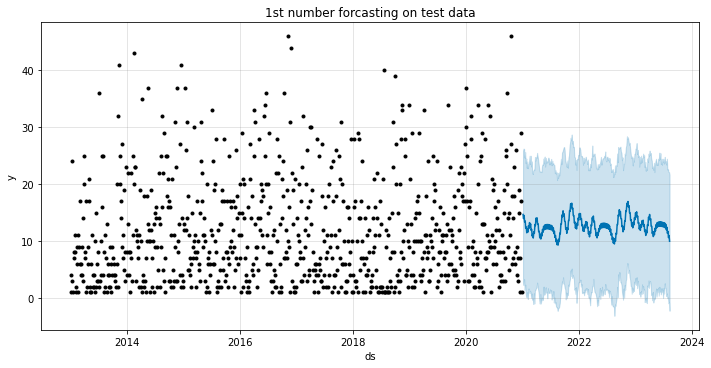

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(model_1_fcst, ax=ax)
plt.title('1st number forcasting on test data')
plt.show()

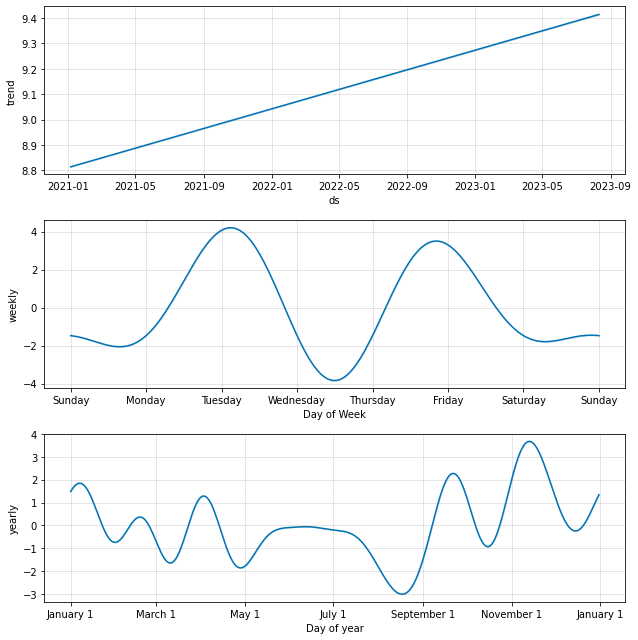

In [64]:
fig = model.plot_components(model_1_fcst)
plt.show()

### Compare forecast to actuals

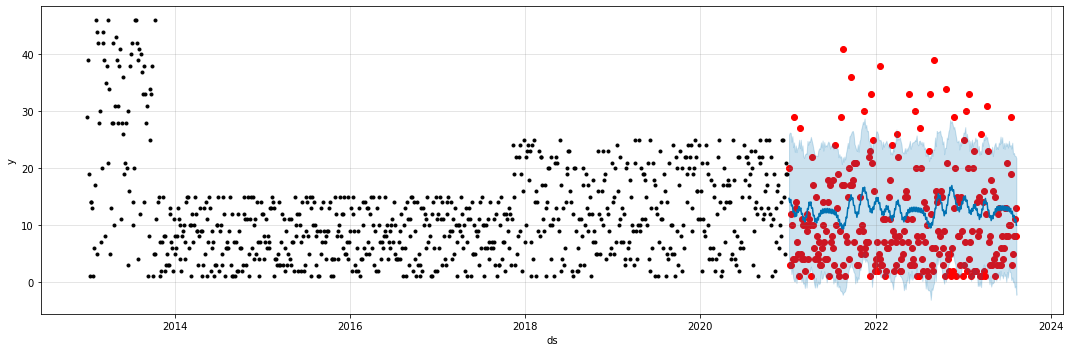

In [96]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test_prophet_1.ds, test['number_1'], color='r')
fig = model.plot(model_1_fcst, ax=ax)

# blue is forecasted, red is actual

In [97]:
# Calculate MAPE
MAPE_1 = mean_absolute_percentage_error(y_true=test['number_1'], y_pred=model_1_fcst['yhat'])
MAPE_1

2.003049118240662

#### 2% error... good? bad? no idea yet...

#### Let's try the same thing with Mega Ball data

18:00:20 - cmdstanpy - INFO - Chain [1] start processing
18:00:20 - cmdstanpy - INFO - Chain [1] done processing


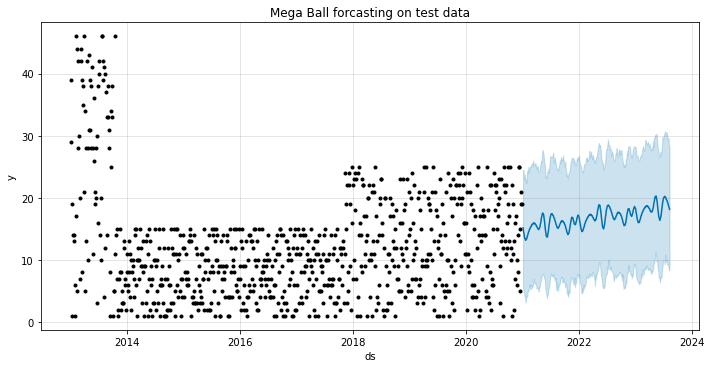

In [98]:
# Create prophet test data for mega ball
train_prophet_mega = train.reset_index().rename(columns={'Draw Date':'ds',
                                                   'Mega Ball':'y'}).drop(['number_2','number_3','number_4','number_5','number_1'],axis=1)

model = Prophet() # must reinstantiate the model each time
model.fit(train_prophet_mega)

test_prophet_mega = test.reset_index().rename(columns={'Draw Date':'ds',
                                                   'Mega Ball':'y'}).drop(['number_2','number_3','number_4','number_5','number_1'],axis=1)
model_mega_fcst = model.predict(test_prophet_mega)

fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(model_mega_fcst, ax=ax)
plt.title('Mega Ball forcasting on test data')
plt.show()

1.4128714416670693

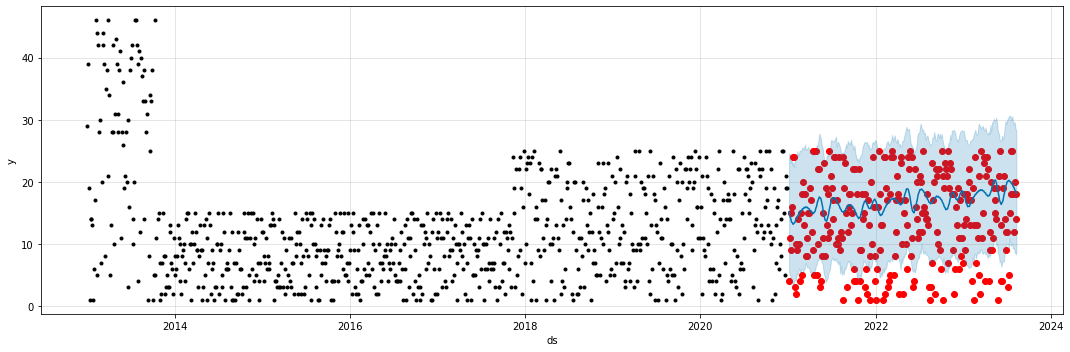

In [99]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test_prophet_mega.ds, test['Mega Ball'], color='r')
fig = model.plot(model_mega_fcst, ax=ax)

MAPE_mega = mean_absolute_percentage_error(y_true=test['Mega Ball'], y_pred=model_mega_fcst['yhat'])
MAPE_mega

#### And for Number 2...

18:00:21 - cmdstanpy - INFO - Chain [1] start processing
18:00:21 - cmdstanpy - INFO - Chain [1] done processing


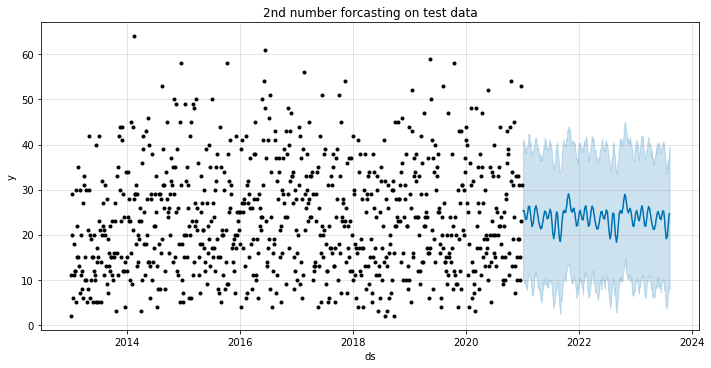

In [100]:
train_prophet_2 = train.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_2':'y'}).drop(['Mega Ball','number_3','number_4','number_5','number_1'],axis=1)

model = Prophet() # must reinstantiate the model each time
model.fit(train_prophet_2)

test_prophet_2 = test.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_2':'y'}).drop(['Mega Ball','number_3','number_4','number_5','number_1'],axis=1)
model_2_fcst = model.predict(test_prophet_2)

fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(model_2_fcst, ax=ax)
plt.title('2nd number forcasting on test data')
plt.show()

0.8295576131726058

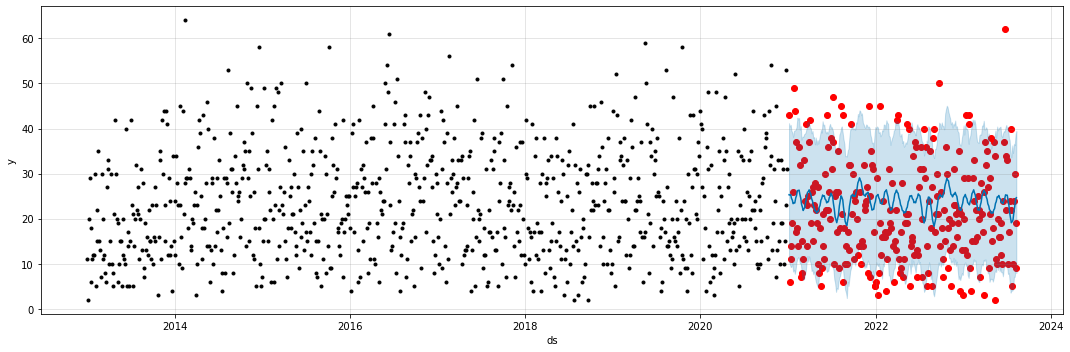

In [101]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test_prophet_2.ds, test['number_2'], color='r')
fig = model.plot(model_2_fcst, ax=ax)

MAPE_2 = mean_absolute_percentage_error(y_true=test['number_2'], y_pred=model_2_fcst['yhat'])
MAPE_2

#### And for Number 3...

18:00:23 - cmdstanpy - INFO - Chain [1] start processing
18:00:23 - cmdstanpy - INFO - Chain [1] done processing


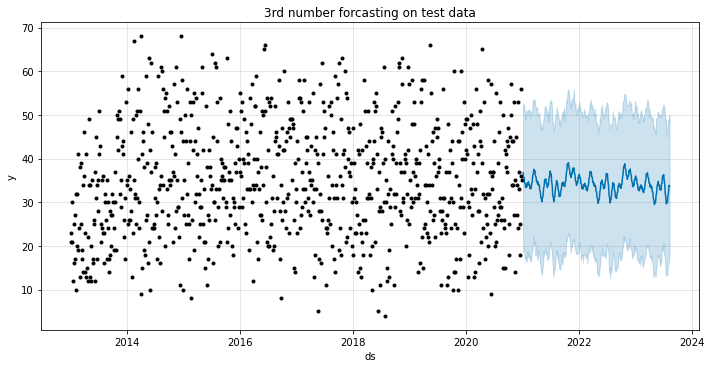

In [102]:
train_prophet_3 = train.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_3':'y'}).drop(['Mega Ball','number_2','number_4','number_5','number_1'],axis=1)

model = Prophet() # must reinstantiate the model each time
model.fit(train_prophet_3)

test_prophet_3 = test.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_3':'y'}).drop(['Mega Ball','number_2','number_4','number_5','number_1'],axis=1)
model_3_fcst = model.predict(test_prophet_3)

fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(model_3_fcst, ax=ax)
plt.title('3rd number forcasting on test data')
plt.show()

0.47624539345706535

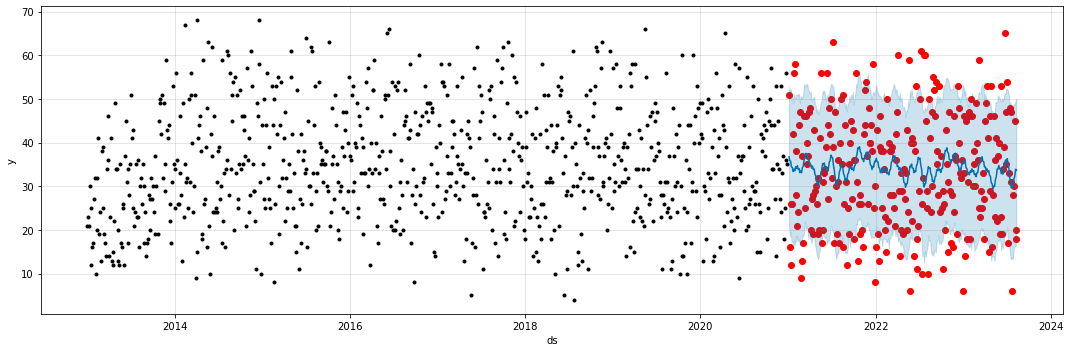

In [103]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test_prophet_3.ds, test['number_3'], color='r')
fig = model.plot(model_3_fcst, ax=ax)

MAPE_3 = mean_absolute_percentage_error(y_true=test['number_3'], y_pred=model_3_fcst['yhat'])
MAPE_3

#### And for Number 4

18:00:24 - cmdstanpy - INFO - Chain [1] start processing
18:00:24 - cmdstanpy - INFO - Chain [1] done processing


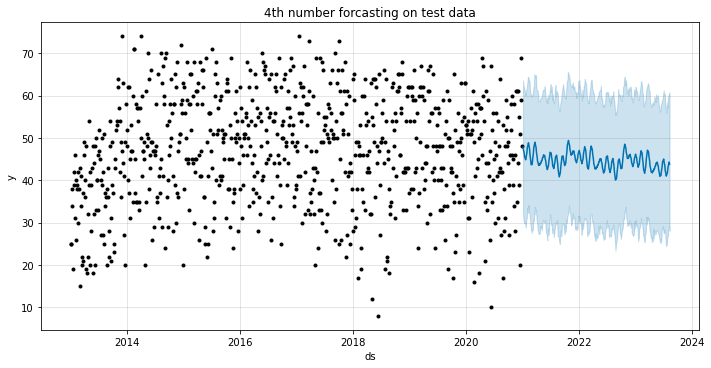

0.2860776862582034

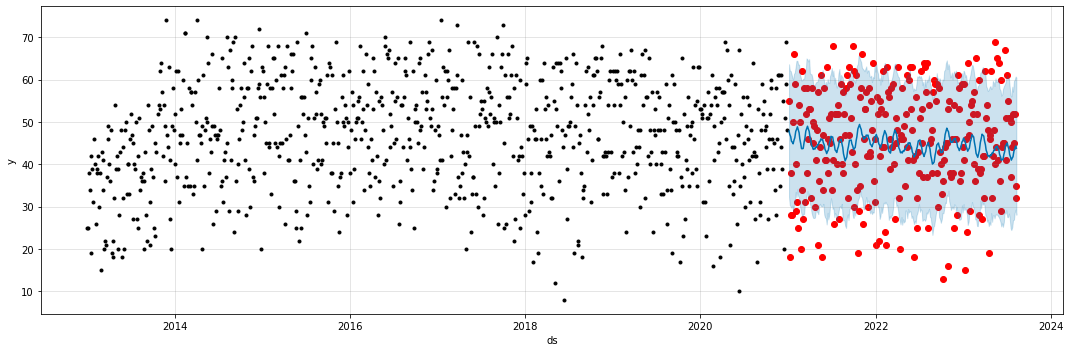

In [104]:
train_prophet_4 = train.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_4':'y'}).drop(['Mega Ball','number_2','number_3','number_5','number_1'],axis=1)

model = Prophet() # must reinstantiate the model each time
model.fit(train_prophet_4)

test_prophet_4 = test.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_4':'y'}).drop(['Mega Ball','number_2','number_3','number_5','number_1'],axis=1)
model_4_fcst = model.predict(test_prophet_4)

fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(model_4_fcst, ax=ax)
plt.title('4th number forcasting on test data')
plt.show()

f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test_prophet_4.ds, test['number_4'], color='r')
fig = model.plot(model_4_fcst, ax=ax)

MAPE_4 = mean_absolute_percentage_error(y_true=test['number_4'], y_pred=model_4_fcst['yhat'])
MAPE_4

#### And lastly for Number 5
###### I probably should've just written a function for all of this...

18:00:25 - cmdstanpy - INFO - Chain [1] start processing
18:00:25 - cmdstanpy - INFO - Chain [1] done processing


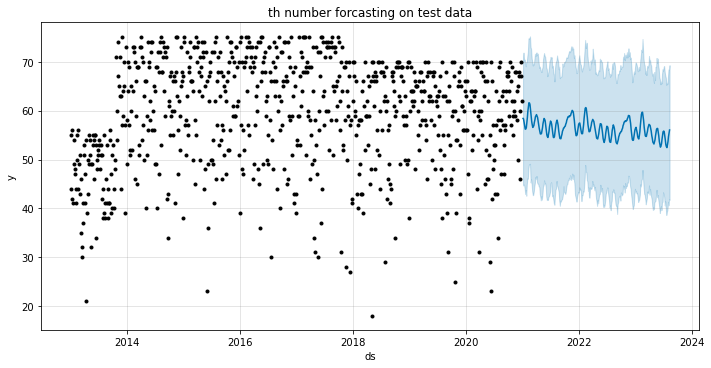

0.18702273169610958

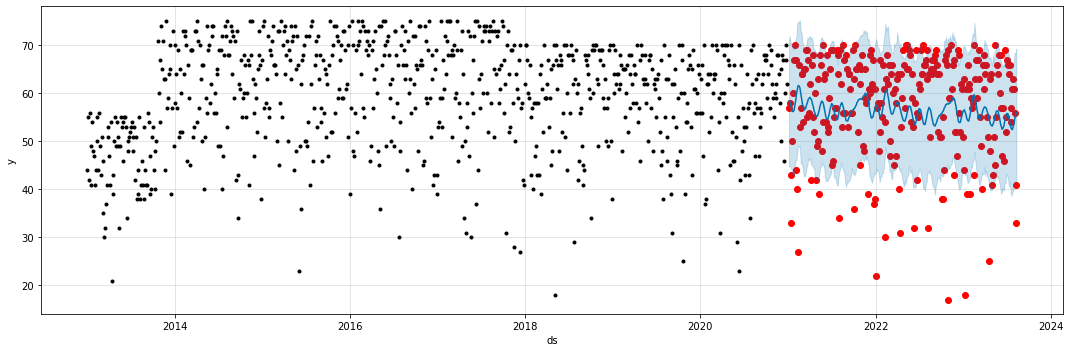

In [105]:
train_prophet_5 = train.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_5':'y'}).drop(['Mega Ball','number_2','number_3','number_4','number_1'],axis=1)

model = Prophet() # must reinstantiate the model each time
model.fit(train_prophet_5)

test_prophet_5 = test.reset_index().rename(columns={'Draw Date':'ds',
                                                   'number_5':'y'}).drop(['Mega Ball','number_2','number_3','number_4','number_1'],axis=1)
model_5_fcst = model.predict(test_prophet_5)

fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(model_5_fcst, ax=ax)
plt.title('th number forcasting on test data')
plt.show()

f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test_prophet_5.ds, test['number_5'], color='r')
fig = model.plot(model_5_fcst, ax=ax)

MAPE_5 = mean_absolute_percentage_error(y_true=test['number_5'], y_pred=model_5_fcst['yhat'])
MAPE_5

In [109]:
# display MAPE for each ball

MAPE_df = pd.DataFrame({
    'Ball ID':['Number 1', 'Number 2', 'Number 3', 'Number 4','Number 5', 'Mega Ball'],
    'Mean Abs Perc Err': [MAPE_1, MAPE_2, MAPE_3, MAPE_4, MAPE_5, MAPE_mega]
})
MAPE_df

,Ball ID,Mean Abs Perc Err
0,Number 1,2.003049
1,Number 2,0.829558
2,Number 3,0.476245
3,Number 4,0.286078
4,Number 5,0.187023
5,Mega Ball,1.412871
